In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [3]:
import tensorflow as tf
from tensorflow import keras

Dataset containing 4000 pictures of cats and dogs (2000 cats, 2000 dogs). We will use 2000 pictures for training, 1000 for validation, and finally 1000 for testing

In [4]:
train_dir = r'C:\Users\pukhr\Python_Notebooks\Data\cats_and_dogs_small\train'
validation_dir = r'C:\Users\pukhr\Python_Notebooks\Data\cats_and_dogs_small\validation'
test_dir =r'C:\Users\pukhr\Python_Notebooks\Data\cats_and_dogs_small\test'

### Data Preprocessing

* Read the picture files.
* Decode the JPEG content to RBG grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [23]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [25]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [26]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/20
100/100 [==============================] - 101s 1s/step - loss: 0.6918 - acc: 0.5195 - val_loss: 0.6758 - val_acc: 0.5310
Epoch 2/20
100/100 [==============================] - 103s 1s/step - loss: 0.6655 - acc: 0.6045 - val_loss: 0.6767 - val_acc: 0.5660
Epoch 3/20
100/100 [==============================] - 89s 889ms/step - loss: 0.6317 - acc: 0.6405 - val_loss: 0.6225 - val_acc: 0.6600
Epoch 4/20
100/100 [==============================] - 88s 885ms/step - loss: 0.5844 - acc: 0.6945 - val_loss: 0.6870 - val_acc: 0.6030
Epoch 5/20
100/100 [==============================] - 89s 886ms/step - loss: 0.5460 - acc: 0.7165 - val_loss: 0.6240 - val_acc: 0.6420
Epoch 6/20
100/100 [==============================] - 89s 886ms/step - loss: 0.5216 - acc: 0.7335 - val_loss: 0.5848 - val_acc: 0.6820
Epoch 7/20
100/100 [==============================] - 89s 886ms/step - loss: 0.4900 - acc: 0.7615 - val_loss: 0.5633 - val_acc: 0.7050
Epoch 8/20
100/100 [==============================] - 88s 8

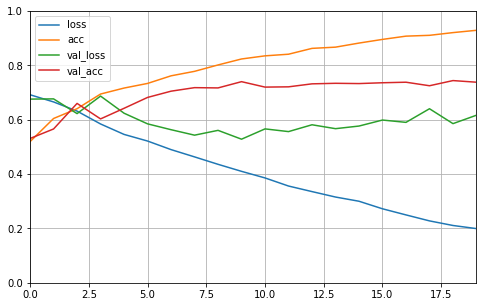

In [27]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
model.save("model.h5")

In [6]:
from tensorflow.keras import backend as K 

K.clear_session()
del model

NameError: name 'model' is not defined

#### Using this technique model is overfitting

#### To solve this problem we use Shear & Rotation

Shear & Rotation: 
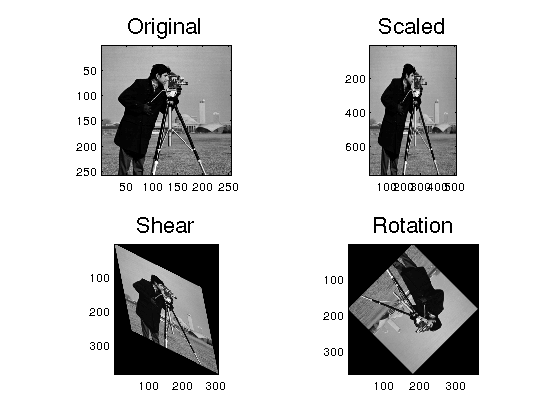

In [7]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


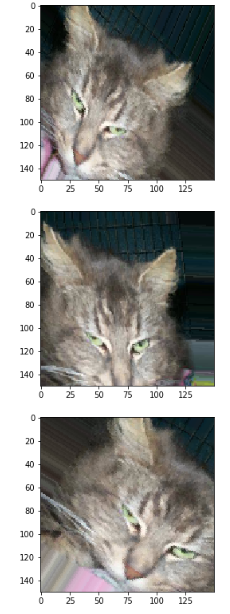

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [32]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 149s 1s/step - loss: 0.6895 - acc: 0.5306 - val_loss: 0.6755 - val_acc: 0.5933
Epoch 2/100
100/100 [==============================] - 150s 2s/step - loss: 0.6789 - acc: 0.5568 - val_loss: 0.6478 - val_acc: 0.6237
Epoch 3/100
100/100 [==============================] - 150s 1s/step - loss: 0.6656 - acc: 0.5864 - val_loss: 0.6474 - val_acc: 0.6022
Epoch 4/100
100/100 [==============================] - 150s 2s/step - loss: 0.6441 - acc: 0.6228 - val_loss: 0.7096 - val_acc: 0.5254
Epoch 5/100
100/100 [==============================] - 148s 1s/step - loss: 0.6280 - acc: 0.6436 - val_loss: 0.6139 - val_acc: 0.6478
Epoch 6/100
100/100 [==============================] - 149s 1s/step - loss: 0.6113 - acc: 0.6540 - val_loss: 0.5834 - val_acc: 0.6802
Epoch 7/100
100/100 [==============================] - 149s 1s/step - loss: 0.6022 - acc: 0.6652 - val_loss: 0.5726 - val_acc: 0.6929
Epoch 8/100
100/100 [==============================] - 149s 1s

In [33]:
model.save("project_cnn.h5")

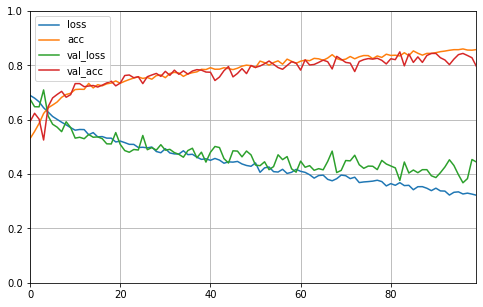

In [38]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Cats VS Dogs Classifier GUI

In [1]:
import tensorflow as tf
from tensorflow import keras
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
from keras.models import load_model

Using TensorFlow backend.


In [2]:
model = tf.keras.models.load_model('model.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
#dictionary to label all traffic signs class.
classes = { 
    0:'its a cat',
    1:'its a dog',
 
}

In [5]:
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('CatsVSDogs Classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((150,150))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    image = image/255
    pred = model.predict_classes([image])[0]
    label.configure(foreground='#011638', ) 
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
   command=lambda: classify(file_path),
   padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',
font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
    (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="CatsVSDogs Classification",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

### Output

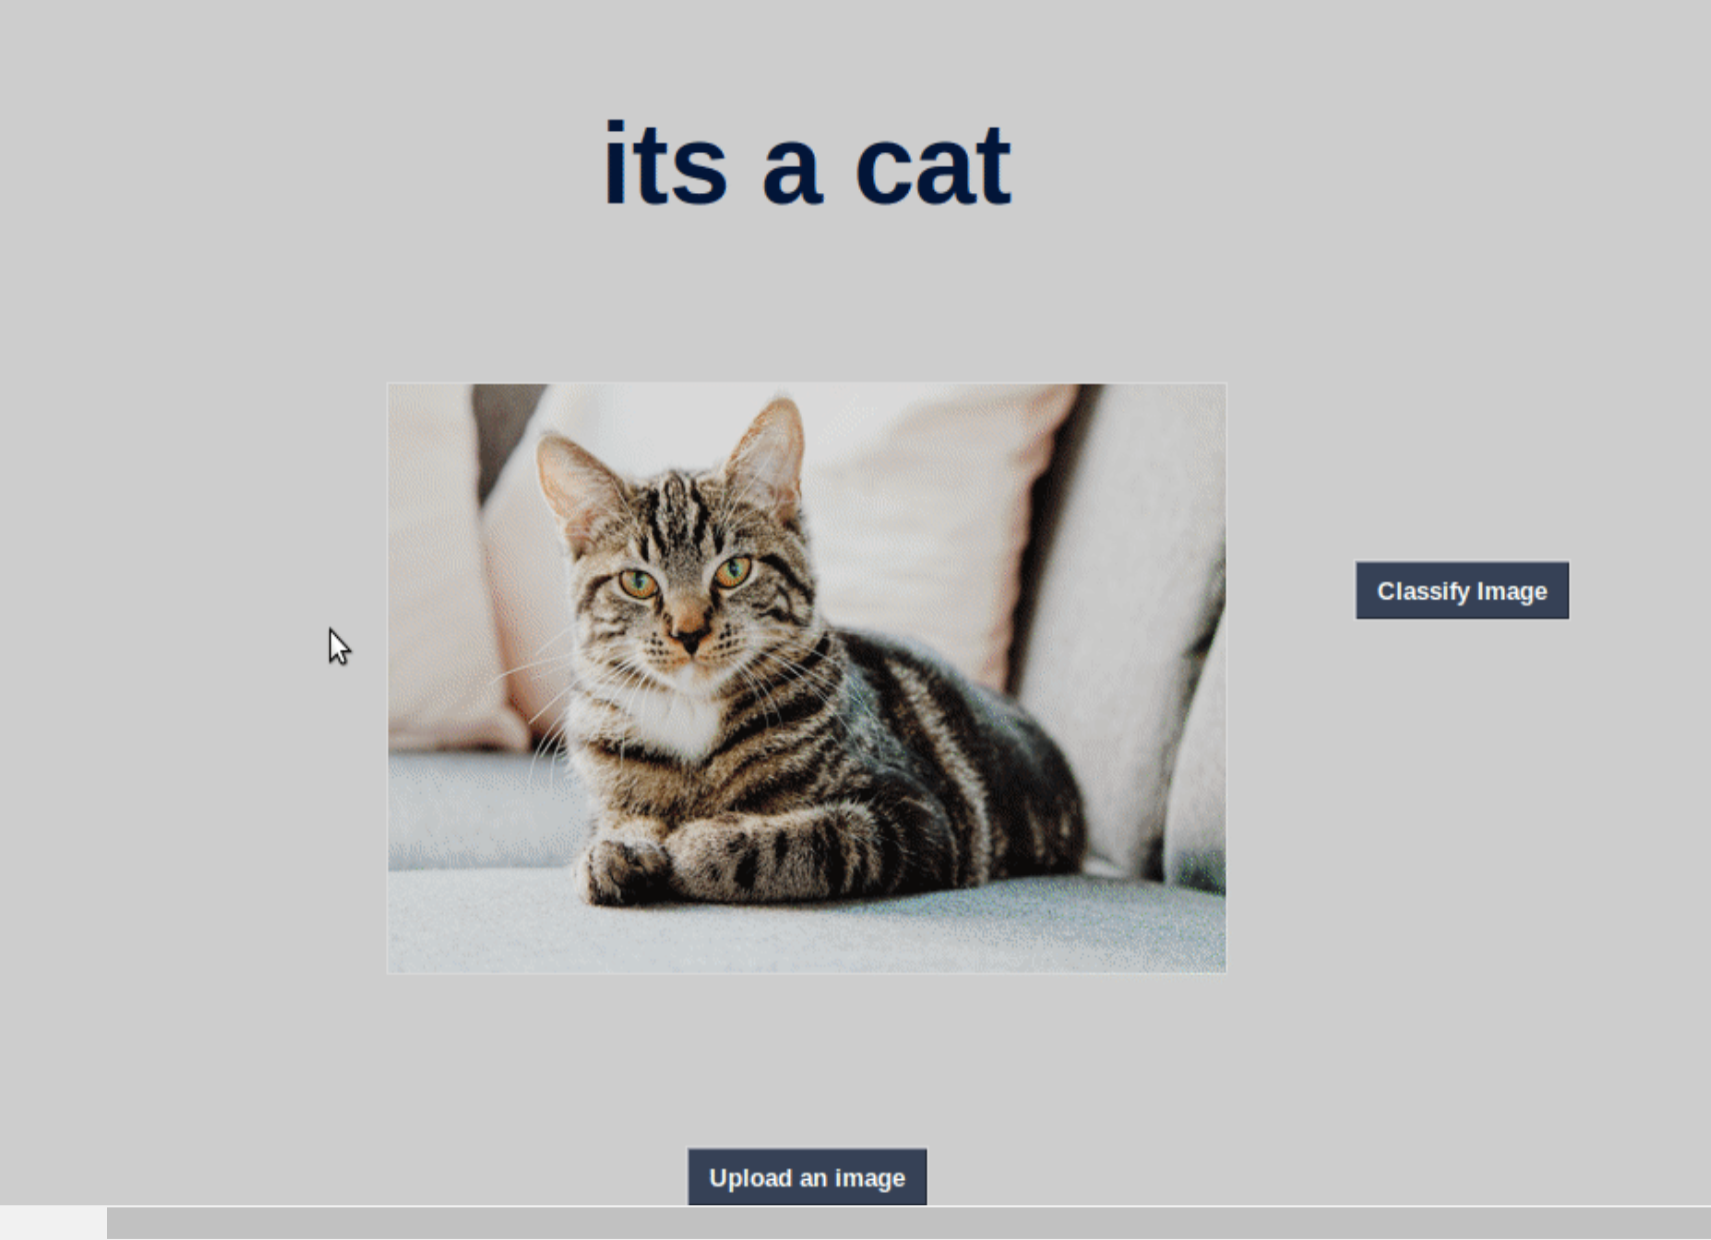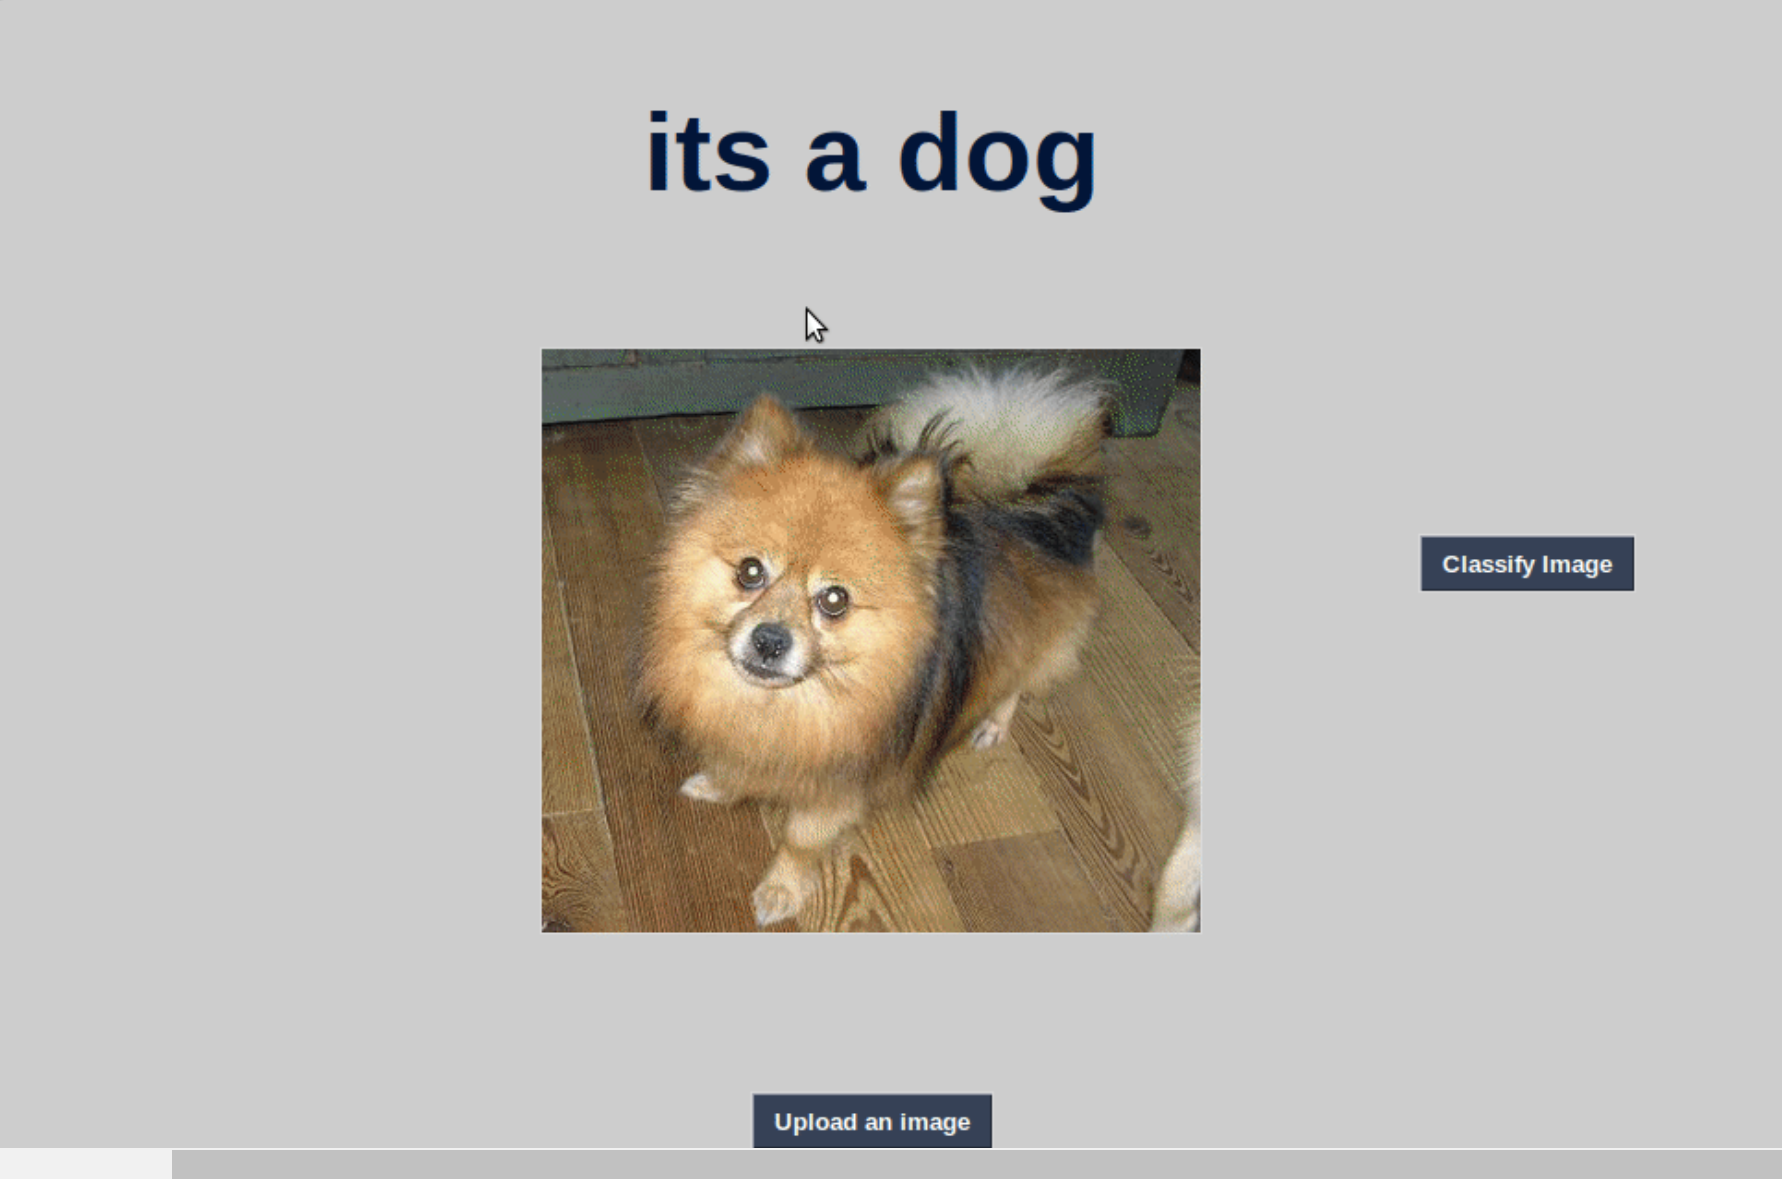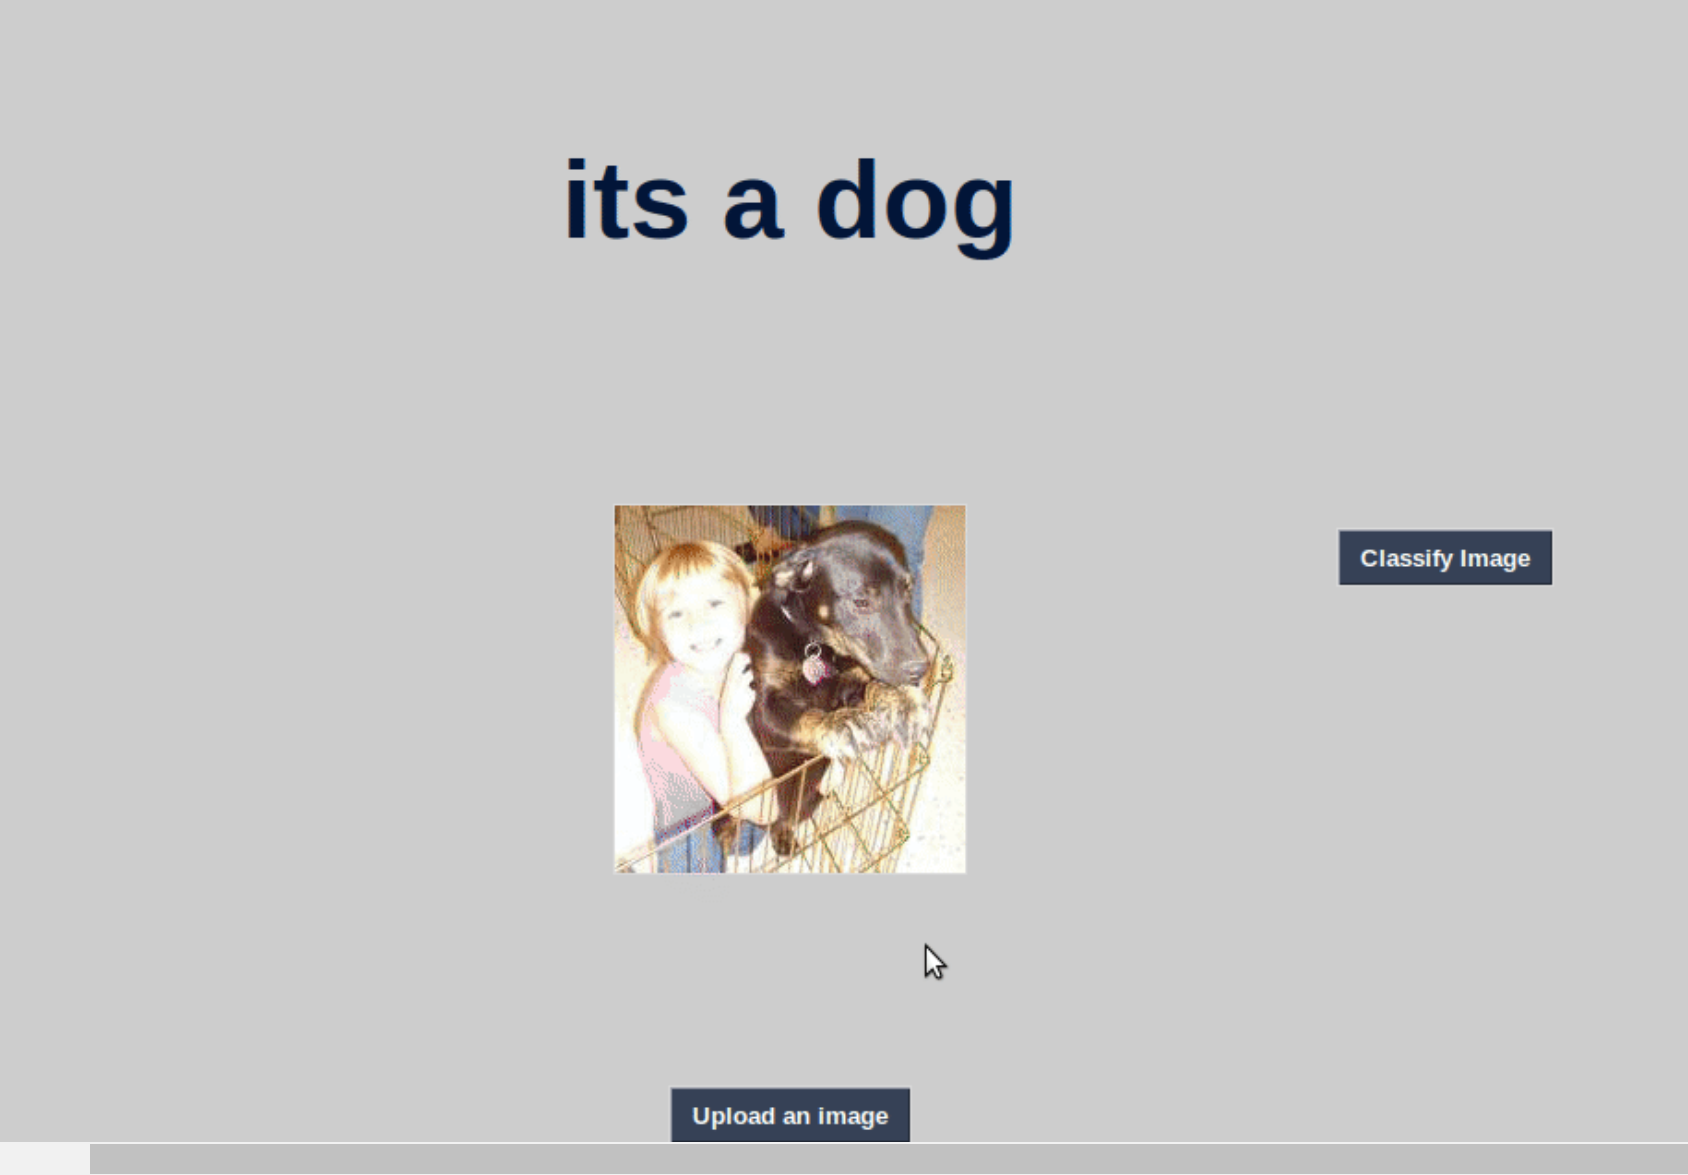